In [1]:
import selenium
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

# Ad.Txt

In [2]:
driver=webdriver.Chrome()

In [3]:
driver.get('https://www.adstxt.com/')

In [4]:
comp = {'Name':['Sortable','Freestar','Snigle Web','Publift','Monumetric','YieldBird','Automatad','AdThrive'],
       'PUB':['pub-3153065230153281','pub-3605257360853185','pub-4276969157128104','pub-5884294479391638','pub-3944954862316283',
             'pub-8241049497608997','pub-8648432769746717','pub-8501674430909082']}
comp = pd.DataFrame(comp)

In [5]:
comp

,Name,PUB
0,Sortable,pub-3153065230153281
1,Freestar,pub-3605257360853185
2,Snigle Web,pub-4276969157128104
3,Publift,pub-5884294479391638
4,Monumetric,pub-3944954862316283
5,YieldBird,pub-8241049497608997
6,Automatad,pub-8648432769746717
7,AdThrive,pub-8501674430909082


In [6]:
er = []
name = []

for i, j in zip(comp['PUB'], comp['Name']):
    driver.get('https://www.adstxt.com/publisher-ids/' + str(i))
    pg1 = driver.find_element_by_css_selector('#spark-app > main > div > div.mb-5 > nav > ul > li:Nth-Last-Child(2)> a' ).text
    pg = int(pg1)+1
    num = np.arange(1,pg)
    print('Scrapping',j,' for PUB Id =',i)
    try:
        for page in num:
            html=driver.page_source
            df=pd.read_html(html)
            df = df[0]
            a = df.drop(df.columns[[0, 2, 2]], axis = 1)
            b = df.shape[0]
            l1 = df['Publisher Domain'].tolist()
            er.extend(l1)
            l2 = [j]*b
            name.extend(l2)
            driver.find_element_by_css_selector('#spark-app > main > div > div.mb-5 > nav > ul > li:Last-Child> a' ).click()
    except NoSuchElementException as e:
        pass

Scrapping Sortable  for PUB Id = pub-3153065230153281
Scrapping Freestar  for PUB Id = pub-3605257360853185
Scrapping Snigle Web  for PUB Id = pub-4276969157128104
Scrapping Publift  for PUB Id = pub-5884294479391638
Scrapping Monumetric  for PUB Id = pub-3944954862316283
Scrapping YieldBird  for PUB Id = pub-8241049497608997
Scrapping Automatad  for PUB Id = pub-8648432769746717
Scrapping AdThrive  for PUB Id = pub-8501674430909082


In [7]:
ds = pd.DataFrame({'Domain' : er ,'Competitor Name' : name})

# Publicwww.com

In [8]:
df1 = pd.read_csv('AdThrive.csv',header=None)
df2 = pd.read_csv('YieldBird.csv',header=None)
df3 = pd.read_csv('Sortable.csv',header=None)
df4 = pd.read_csv('Publift.csv',header=None)
df5 = pd.read_csv('Monumetric.csv',header=None)
df6 = pd.read_csv('Freestar.csv',header=None)
df7 = pd.read_csv('Automatad.csv',header=None)
df8 = pd.read_csv('AndBeyond.csv',header=None)

In [9]:
l3 = [df1, df2, df3, df4, df5, df6, df7, df8]
l4 = ['AdThrive','YieldBird','Sortable','Publift','Monumetric','Freestar','Automatad','AndBeyond' ]


we = []
c1 = []

for i,j in zip(l3,l4):
    i['Domain'] = i[0]
    split_d = i['Domain'].str.split("/", expand= True)
    split_d = split_d[[2]]
    b = split_d.shape[0]
    l1 = split_d[2].tolist()
    we.extend(l1)
    l2 = [j]*b
    c1.extend(l2)
    
ds1 = pd.DataFrame({'Domain' : we ,'Competitor Name' : c1})

# JSON

In [10]:
df1 = pd.read_csv('ad thrive1.csv')
df2 = pd.read_csv('Yieldbird1.csv')
df3 = pd.read_csv('Sortable1.csv')
df4 = pd.read_csv('Publift1.csv')
df5 = pd.read_csv('monumetric1.csv')
df6 = pd.read_csv('FREESTAR1.csv')
df7 = pd.read_csv('Automatad1.csv')
df8 = pd.read_csv('snigle1.csv')
df9 = pd.read_csv('andbeyond.media.csv')

In [11]:
l4 = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
l5 = ['AdThrive','YieldBird','Sortable','Publift','Monumetric','Freestar','Automatad','Snigle Web','AndBeyond' ]

jd = []
jn = []

for i,j in zip(l4,l5):
    i= i[['sellers__domain']]
    b = i.shape[0]
    l1 = i['sellers__domain'].tolist()
    jd.extend(l1)
    l2 = [j]*b
    jn.extend(l2)
    
ds2 = pd.DataFrame({'Domain' : jd ,'Competitor Name' : jn})

# Final Data

In [12]:
frames = [ds, ds1, ds2]

result = pd.concat(frames,ignore_index=True)
result['Domain'] = result['Domain'].str.replace('www.','')

In [13]:
result


,Domain,Competitor Name
0,1911addicts.com,Sortable
1,22dollars.com,Sortable
2,24wrestling.com,Sortable
3,360tuna.com,Sortable
4,3dshoots.com,Sortable
...,...,...
25487,femalenetwork.com,AndBeyond
25488,spot.ph,AndBeyond
25489,cosmo.ph,AndBeyond
25490,candymag.com,AndBeyond


# Duplicate

In [15]:
result = result.drop_duplicates(ignore_index=True)
result = result.dropna()
result

,Domain,Competitor Name
0,1911addicts.com,Sortable
1,22dollars.com,Sortable
2,24wrestling.com,Sortable
3,360tuna.com,Sortable
4,3dshoots.com,Sortable
...,...,...
20582,femalenetwork.com,AndBeyond
20583,spot.ph,AndBeyond
20584,cosmo.ph,AndBeyond
20585,candymag.com,AndBeyond


In [17]:
domain_du = result[result.duplicated('Domain', keep = False)]

In [26]:
domain_du = domain_du.sort_values(by=['Domain'],ignore_index = True)

In [41]:
a[a['Domain'].values == 'heavy.com']

,Domain,Competitor Name
297,heavy.com,Sortable
14249,heavy.com,AdThrive


In [24]:
result = result.dropna()

# Exporting

In [25]:
result.to_csv("adpushup_fina_data.csv")

In [27]:
domain_du.to_csv("adpushup_Domain.csv")

In [30]:
t = pd.read_csv('GKG Competitor.csv')

In [39]:
t['Website '].nunique()

20052

YieldBird     9973
AdThrive      3648
Sortable      2133
Monumetric    1810
Freestar       880
Automatad      666
AndBeyond      606
Publift        516
Snigle Web     348
Name: Competiton Live , dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sortable'),
  Text(1, 0, 'Freestar'),
  Text(2, 0, 'Snigle Web'),
  Text(3, 0, 'Publift'),
  Text(4, 0, 'Monumetric'),
  Text(5, 0, 'YieldBird'),
  Text(6, 0, 'Automatad'),
  Text(7, 0, 'AdThrive'),
  Text(8, 0, 'AndBeyond')])

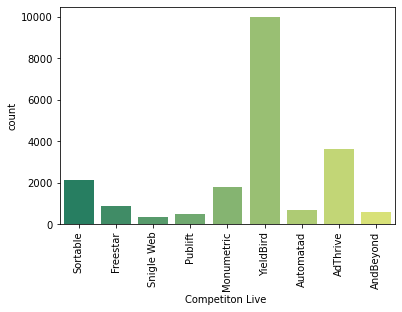

In [41]:
print(t['Competiton Live '].value_counts())
sns.countplot(t['Competiton Live '],palette="summer")
plt.xticks(rotation=90)